In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
import xgboost
import pandas_profiling as pf
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('OnlineNewsPopularity.csv')

In [3]:
#Removing spaces in column names
df.columns=[i.strip() for i in df.columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

In [7]:
pd.set_option('display.max_colwidth', 500)

In [21]:
df.select_dtypes('number').columns

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glob

In [69]:
df.select_dtypes('object').columns

Index(['url', 'weekdays', 'data_channel'], dtype='object')

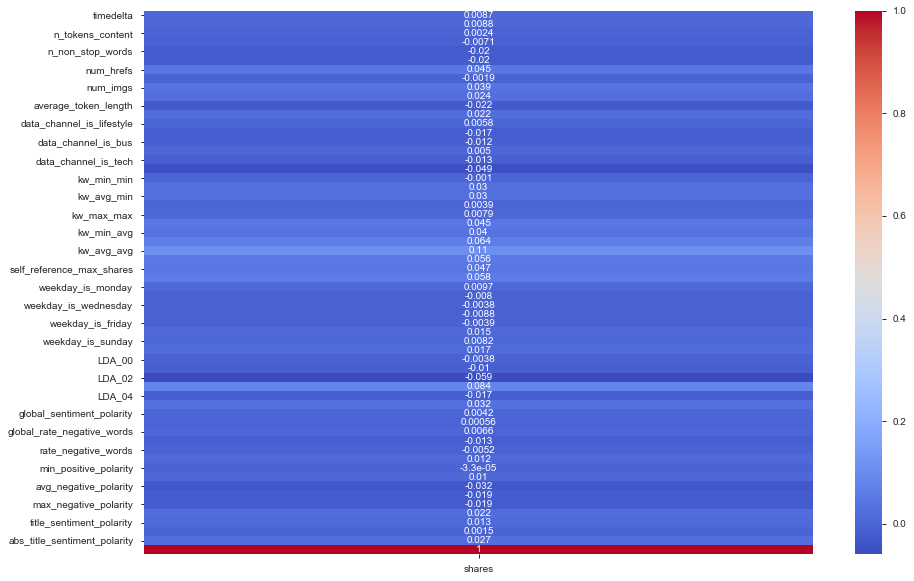

In [99]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.DataFrame(df.corr()['shares']),cmap='coolwarm',annot=True)
plt.show()


In [ ]:
# None of the features are highly correlated with target 

## Bivariate Analysis

## Words

<ol>
<li>n_tokens_title: Number of words in the title
<li>n_tokens_content: Number of words in the content
<li>n_unique_tokens: Rate of unique words in the content
<li>n_non_stop_words: Rate of non-stop words in the content
<li>n_non_stop_unique_tokens: Rate of unique non-stop words in the content
<li>average_token_length: Average length of the words in the content
</ol>

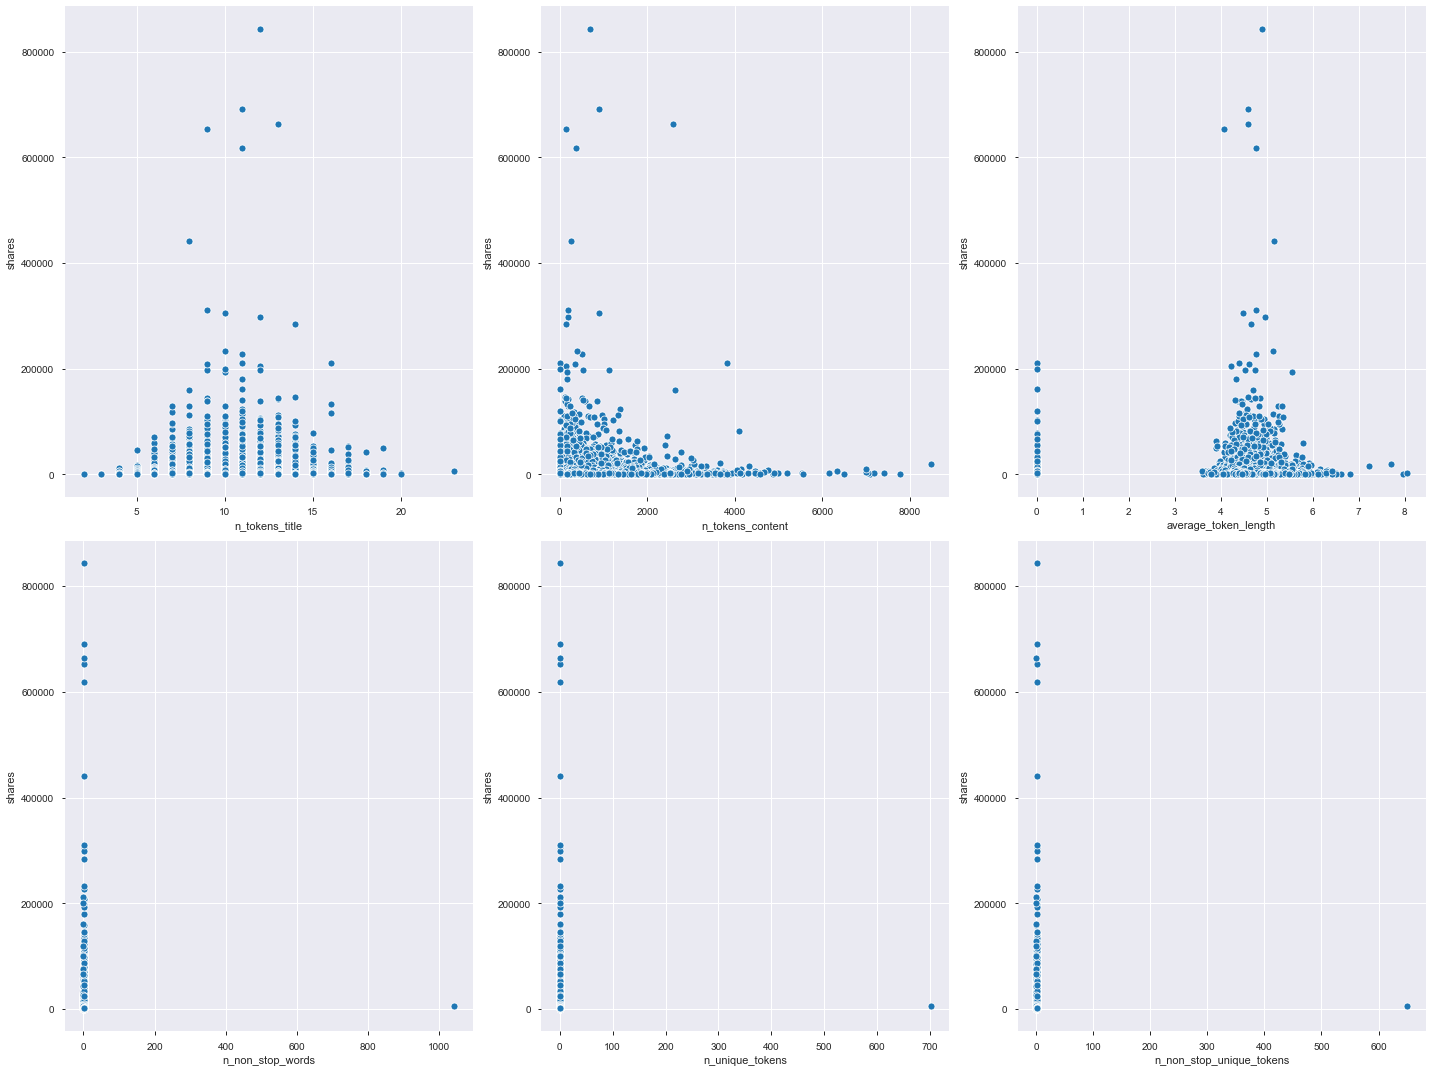

In [34]:
cnt=1
words=['n_tokens_title','n_tokens_content','average_token_length','n_non_stop_words','n_unique_tokens','n_non_stop_unique_tokens']
plt.figure(figsize=(20,15))
for i in words:
    plt.subplot(2,3,cnt)
    cnt+=1
    sns.scatterplot(df[i],df.shares)
plt.tight_layout()
plt.show()

In [ ]:
## Here we can clearly see n_tokens_title,average_token_length are affected by no of shares whereas 
# other  features are not affected by no of shares and remain constant
# We can also see clearly in below 3 columns there is one single datapoint which is causing skewness in all three col 

In [45]:
#Outlier
df[df.n_non_stop_words==max(df.n_non_stop_words)]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
31037,http://mashable.com/2014/08/18/ukraine-civilian-convoy-attacked/,142.0,9.0,1570.0,701.0,1042.0,650.0,11.0,10.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5900


In [88]:
#Dropping the outlier
df=df.drop(df.index[31037])

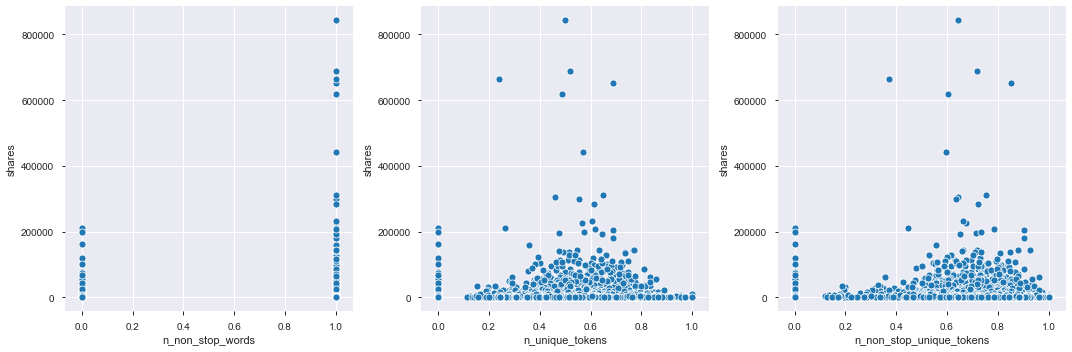

In [90]:
token=['n_non_stop_words','n_unique_tokens','n_non_stop_unique_tokens']
cnt=1
plt.figure(figsize=(15,5))
for i in token:
    plt.subplot(1,3,cnt)
    cnt+=1
    sns.scatterplot(df[i],df.shares)
plt.tight_layout()
plt.show()

In [ ]:
# Here we can see unique tokens and non stop unique tokens now have much more clear distribution after removing outlier
# and we can see that n_unique_tokens and n_non_stop_unique_tokens are significant columns in comparison to others

## Links and digital media
<ol>
<li>num_hrefs: Number of links
<li>num_self_hrefs: Number of links to other articles published by Mashable
<li>num_imgs: Number of images
<li>num_videos: Number of videos
</ol>

In [35]:
link_med= ['num_hrefs','num_self_hrefs','num_imgs','num_videos']

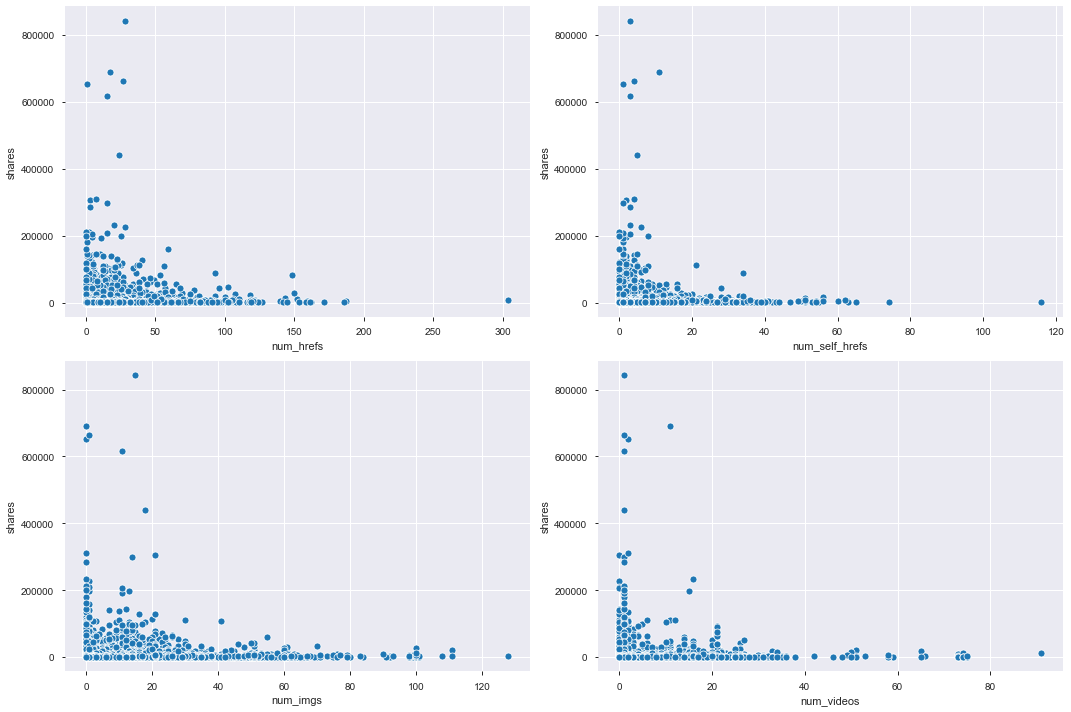

In [48]:
cnt=1
plt.figure(figsize=(15,10))
for i in link_med:
    plt.subplot(2,2,cnt)
    cnt+=1
    sns.scatterplot(df[i],df.shares)
plt.tight_layout()
plt.show()

In [ ]:
#  one inference can be made here that lesser the number of images,videos,self reference links or hrefs, 
#more is the number of shares

In [5]:
# Merging the weekdays columns channels as one single column
publishdayMerge=df[['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 
                      'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday' ]]
temp_arr=[]
for r in list(range(publishdayMerge.shape[0])):
    for c in list(range(publishdayMerge.shape[1])):
        if ((c==0) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Monday')
        elif ((c==1) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Tuesday')
        elif ((c==2) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Wednesday')
        elif ((c==3) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Thursday')
        elif ((c==4) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Friday')
        elif ((c==5) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Saturday') 
        elif ((c==6) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Sunday')
            
# Merging the data channels as one single column
DataChannelMerge=df[['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus',
                        'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world' ]]
#logic to merge data channel
DataChannel_arr=[]
for r in list(range(DataChannelMerge.shape[0])):
    if (((DataChannelMerge.iloc[r,0])==0) and ((DataChannelMerge.iloc[r,1])==0) and ((DataChannelMerge.iloc[r,2])==0) and ((DataChannelMerge.iloc[r,3])==0) and ((DataChannelMerge.iloc[r,4])==0) and ((DataChannelMerge.iloc[r,5])==0)):
        DataChannel_arr.append('Others')# if all columns have 0 value so put in Others category
    for c in list(range(DataChannelMerge.shape[1])):
        if ((c==0) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Lifestyle')
        elif ((c==1) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Entertainment')
        elif ((c==2) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Business')
        elif ((c==3) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Social Media')
        elif ((c==4) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Tech')
        elif ((c==5) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('World')

In [6]:
# merge the the new data into the dataframe
df.insert(loc=11, column='weekdays', value=temp_arr)
df.insert(loc=12, column='data_channel', value=DataChannel_arr)

 
print(df.shape)

(39644, 63)


## Published Day

In [52]:
df.groupby('weekdays')['shares'].mean()

weekdays
Friday       3285.181021
Monday       3647.025822
Saturday     4078.185079
Sunday       3746.740592
Thursday     3178.599147
Tuesday      3202.500677
Wednesday    3303.405380
Name: shares, dtype: float64

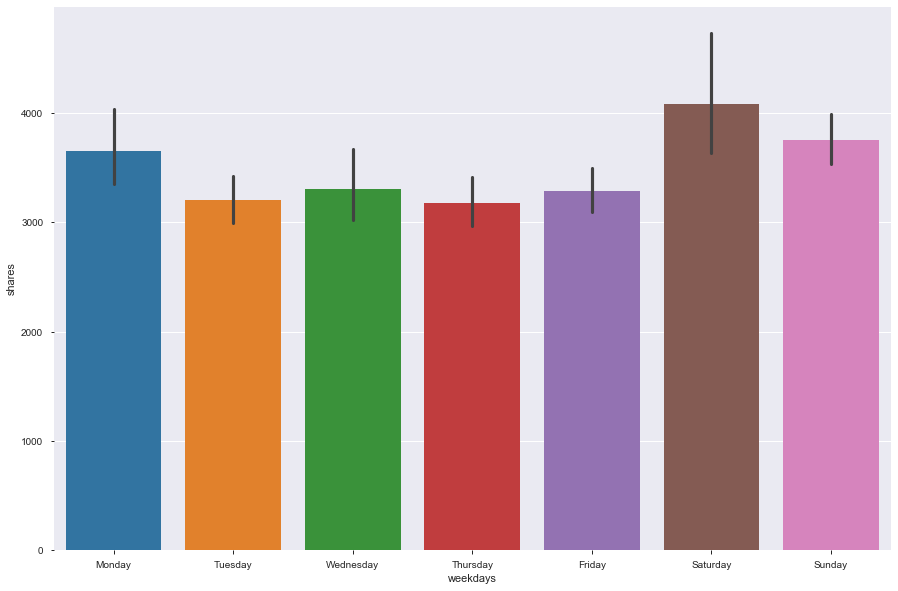

In [56]:
plt.figure(figsize=(15,10))
sns.barplot(df.weekdays,df.shares)
plt.show()
# Here mean shares is relatively high for articles published on saturday,sunday and monday while it is similar for rest of days

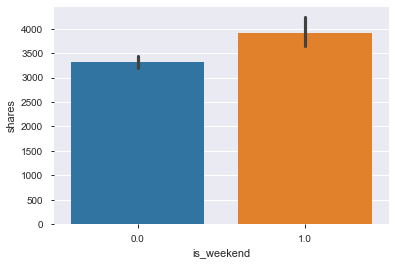

In [49]:
sns.barplot(df.is_weekend,df.shares)
plt.show()

In [16]:
import scipy.stats as stats

In [17]:
# Since pvalue is less than .05 so means of both are different and Weekdays is a significant column
stats.f_oneway(df[df.weekdays=='Monday']['shares'],df[df.weekdays=='Tuesday']['shares'],df[df.weekdays=='Wednesday']['shares'],df[df.weekdays=='Thursday']['shares'],df[df.weekdays=='Friday']['shares'],df[df.weekdays=='Saturday']['shares'],df[df.weekdays=='Sunday']['shares'])

F_onewayResult(statistic=3.2705807228469483, pvalue=0.0032356452506011003)

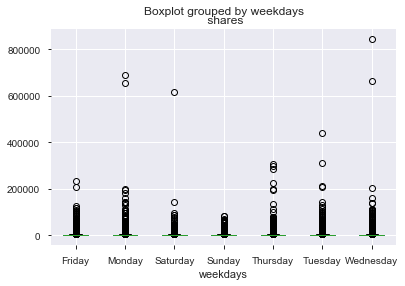

In [139]:
df.boxplot(column=' shares',by='weekdays')
plt.show()

## Type of News

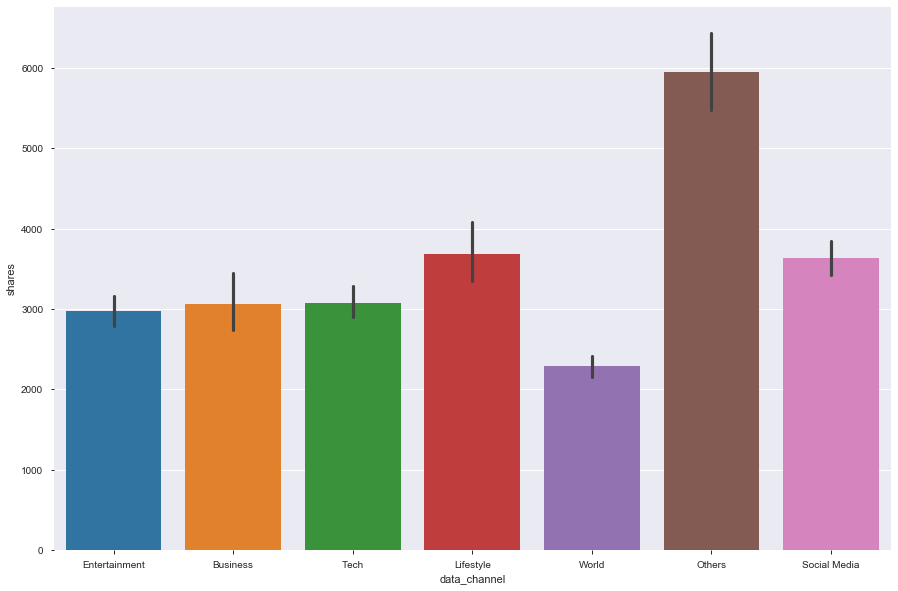

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(df.data_channel,df['shares'])
plt.show()
#max mean of shares is from others category

In [132]:
# since pvalue is almost close to 0 so we can say means of both the variables are diff and data_channel is a significant column
stats.f_oneway(df[df.data_channel=='Entertainment'][' shares'],df[df.data_channel=='Business'][' shares'],df[df.data_channel=='Tech'][' shares'],df[df.data_channel=='Lifestyle'][' shares'],df[df.data_channel=='World'][' shares'],df[df.data_channel=='Others'][' shares'],df[df.data_channel=='Social Media'][' shares'])

F_onewayResult(statistic=66.30069674357748, pvalue=2.1903903915669796e-82)

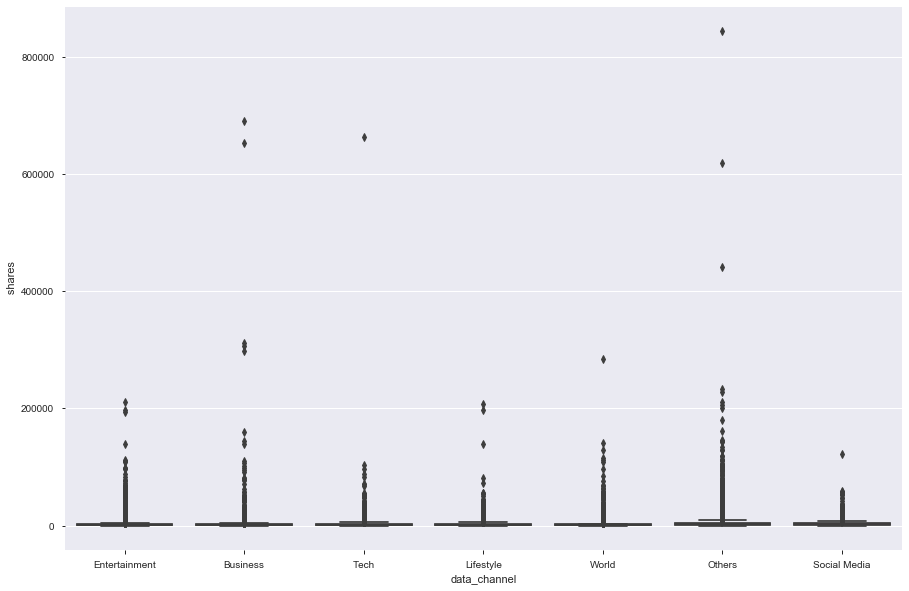

In [133]:
plt.figure(figsize=(15,10))
sns.boxplot(df.data_channel,df[' shares'])
plt.show()

In [111]:
df.groupby('data_channel')[' shares'].mean()

data_channel
Business         3063.018536
Entertainment    2970.487034
Lifestyle        3682.123392
Others           5945.189599
Social Media     3629.383125
Tech             3072.283283
World            2287.734069
Name:  shares, dtype: float64

### Keywords
<ol>
    <li>num_keywords: Number of keywords in the metadata
    <li>kw_min_min: Worst keyword (min. shares)
    <li>kw_max_min: Worst keyword (max. shares)
    <li>kw_avg_min: Worst keyword (avg. shares)
    <li>kw_min_max: Best keyword (min. shares)
    <li>kw_max_max: Best keyword (max. shares)
    <li>kw_avg_max: Best keyword (avg. shares)
    <li>kw_min_avg: Avg. keyword (min. shares)
    <li>kw_max_avg: Avg. keyword (max. shares)
    <li>kw_avg_avg: Avg. keyword (avg. shares)
 <ol>

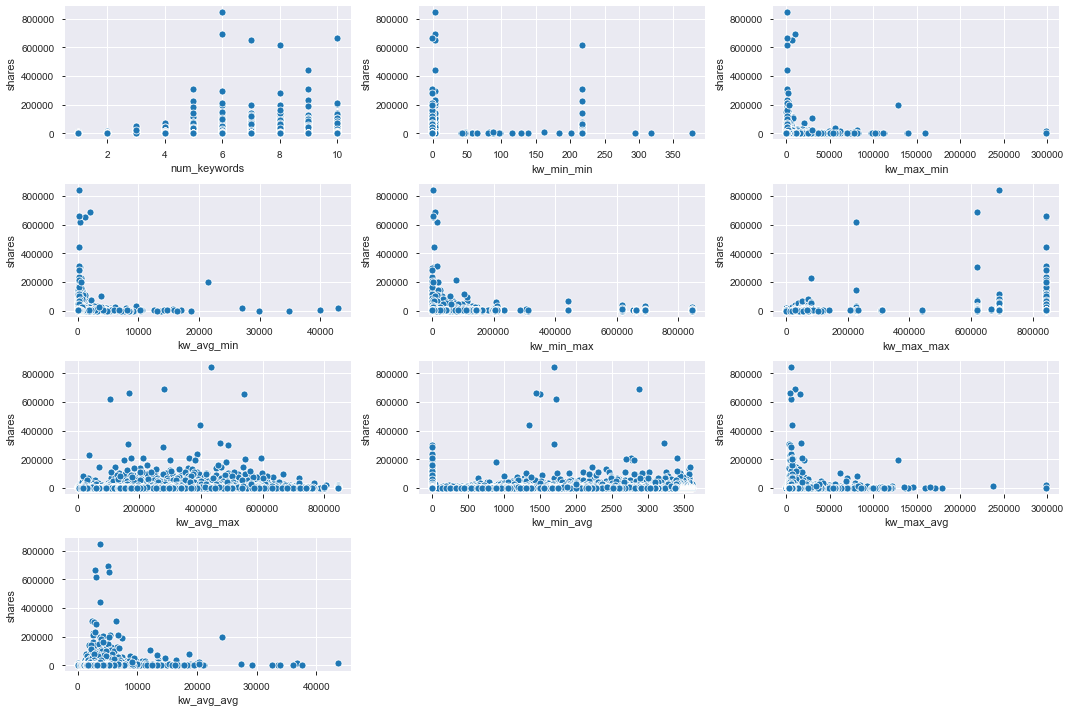

In [58]:
keywords = ['num_keywords','kw_min_min','kw_max_min','kw_avg_min','kw_min_max','kw_max_max','kw_avg_max','kw_min_avg','kw_max_avg','kw_avg_avg']
cnt=1
plt.figure(figsize=(15,10))
for i in keywords:
    plt.subplot(4,3,cnt)
    cnt+=1
    sns.scatterplot(df[i],df.shares)
plt.tight_layout()
plt.show()

In [ ]:
df

### num_keywords vs shares

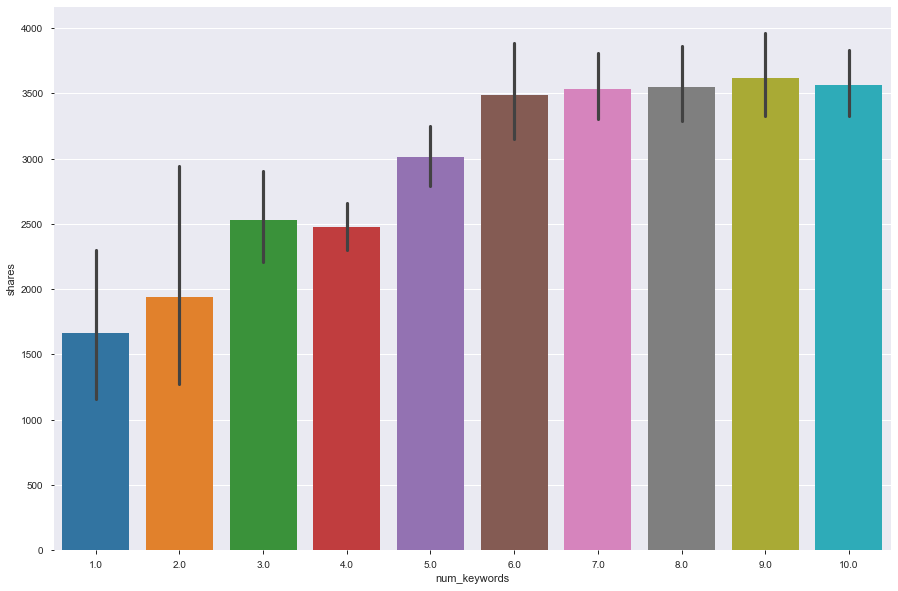

In [20]:
plt.figure(figsize=(15,10))
sns.barplot(df['num_keywords'],df['shares'])
plt.show()

# more the no of keywords , more the no of shares

## Self Referencing links(#no of shares of articles mentioned in article)
<ol>
    <li>self_reference_min_shares: Min. shares of referenced articles in Mashable 
    <li>self_reference_max_shares: Max. shares of referenced articles in Mashable
    <li>self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
<ol>

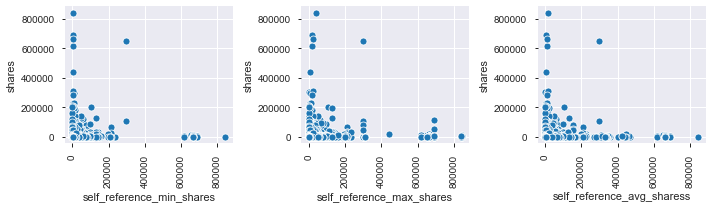

In [68]:
self_href = ['self_reference_min_shares','self_reference_max_shares','self_reference_avg_sharess']
cnt=1
plt.figure(figsize=(10,3))
for i in self_href:
    plt.subplot(1,3,cnt)
    cnt+=1
    sns.scatterplot(df[i],df.shares)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
## Here we can see  total no of shares of article may either be low or high , the no of shares of self referencing links is same
# so self referencing links are not impacting signiificantly total no of shares of article


## NLP Features
<ol>
<li>LDA_00: Closeness to LDA topic 0
<li>LDA_01: Closeness to LDA topic 1
<li>LDA_02: Closeness to LDA topic 2
<li>LDA_03: Closeness to LDA topic 3
<li>LDA_04: Closeness to LDA topic 4
<li>title_subjectivity: Title subjectivity
<li>title_sentiment_polarity: Title polarity
<li>abs_title_subjectivity: Absolute subjectivity level
<li>abs_title_sentiment_polarity: Absolute polarity level
<li>global_subjectivity: Text subjectivity
<li>global_sentiment_polarity: Text sentiment polarity
<li>global_rate_positive_words: Rate of positive words in the content
<li>global_rate_negative_words: Rate of negative words in the content
<li>avg_positive_polarity: Avg. polarity of positive words
<li>min_positive_polarity: Min. polarity of positive words
<li>max_positive_polarity: Max. polarity of positive words
<li>avg_negative_polarity: Avg. polarity of negative words
<li>min_negative_polarity: Min. polarity of negative words
<li>max_negative_polarity: Max. polarity of negative words
</ol>

### Closeness to LDA topic

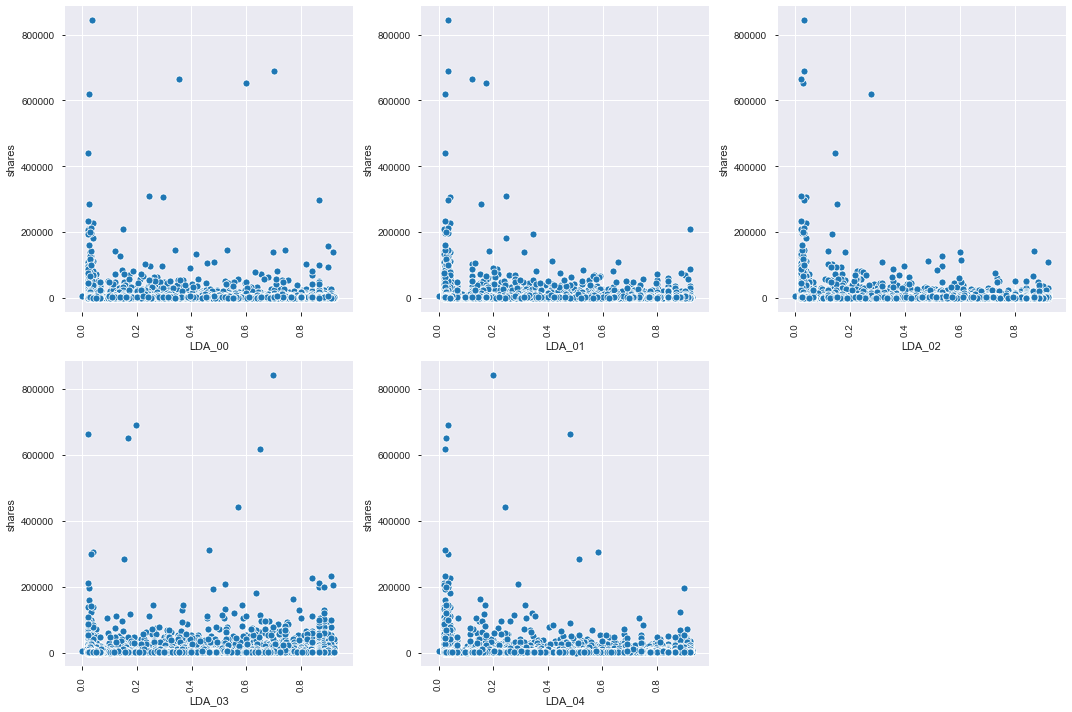

In [73]:
lda=['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04']
cnt=1
plt.figure(figsize=(15,10))
for i in lda:
    plt.subplot(2,3,cnt)
    cnt+=1
    sns.scatterplot(df[i],df.shares)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#Shares are independent of closeness to LDA topic

### Title related

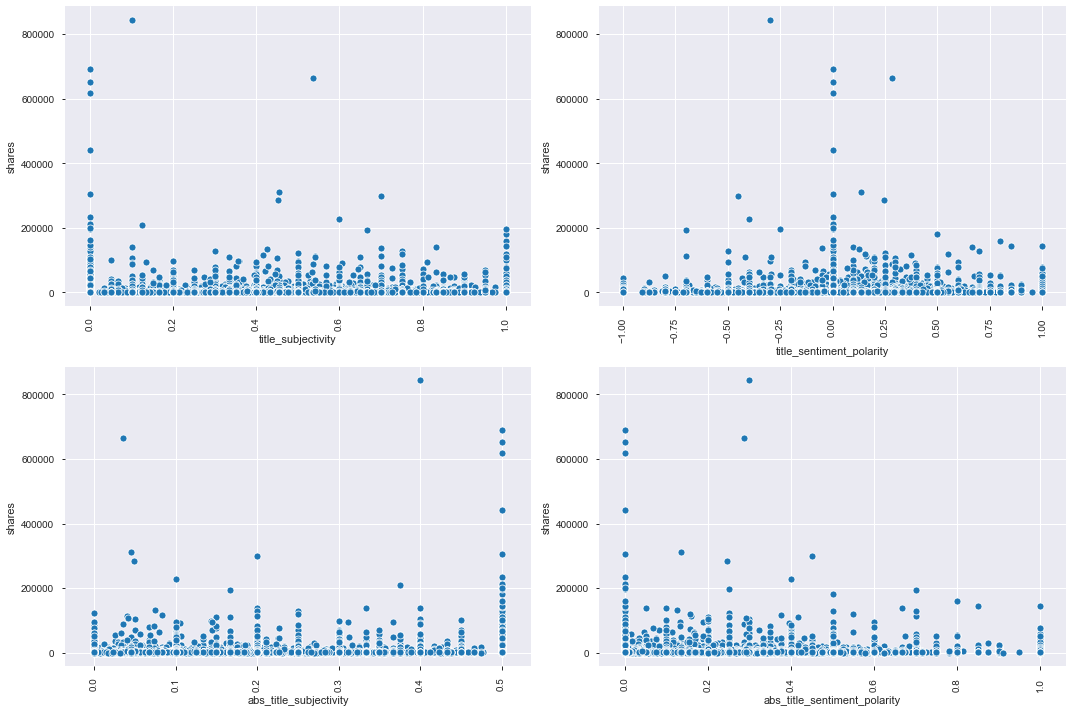

In [77]:
title=['title_subjectivity','title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity']
cnt=1
plt.figure(figsize=(15,10))
for i in title:
    plt.subplot(2,2,cnt)
    cnt+=1
    sns.scatterplot(df[i],df.shares)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<li>title subjectivity: lesser the title subjectivity, more are the no of shares
<li>title sentiment polarity: neutral words in title get more no of shares
<li>abs_title_subjectivity: higher the abs_title_subjectivity, higher the number of shares
<li>abs_title_sentiment_polarity: title with almost 0 abs_title_sentiment_polarity have higher shares

## Polarity
<li>global_subjectivity: Text subjectivity
<li>global_sentiment_polarity: Text sentiment polarity
<li>global_rate_positive_words: Rate of positive words in the content
<li>global_rate_negative_words: Rate of negative words in the content
<li>rate_positive_words: Rate of positive words among non-neutral tokens
<li>rate_negative_words: Rate of negative words among non-neutral tokens
<li>avg_positive_polarity: Avg. polarity of positive words
<li>min_positive_polarity: Min. polarity of positive words
<li>max_positive_polarity: Max. polarity of positive words
<li>avg_negative_polarity: Avg. polarity of negative words
<li>min_negative_polarity: Min. polarity of negative words
<li>max_negative_polarity: Max. polarity of negative words

In [5]:
pol=['global_subjectivity','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words',
'avg_positive_polarity','min_positive_polarity','max_positive_polarity','avg_negative_polarity','min_negative_polarity',
'max_negative_polarity']

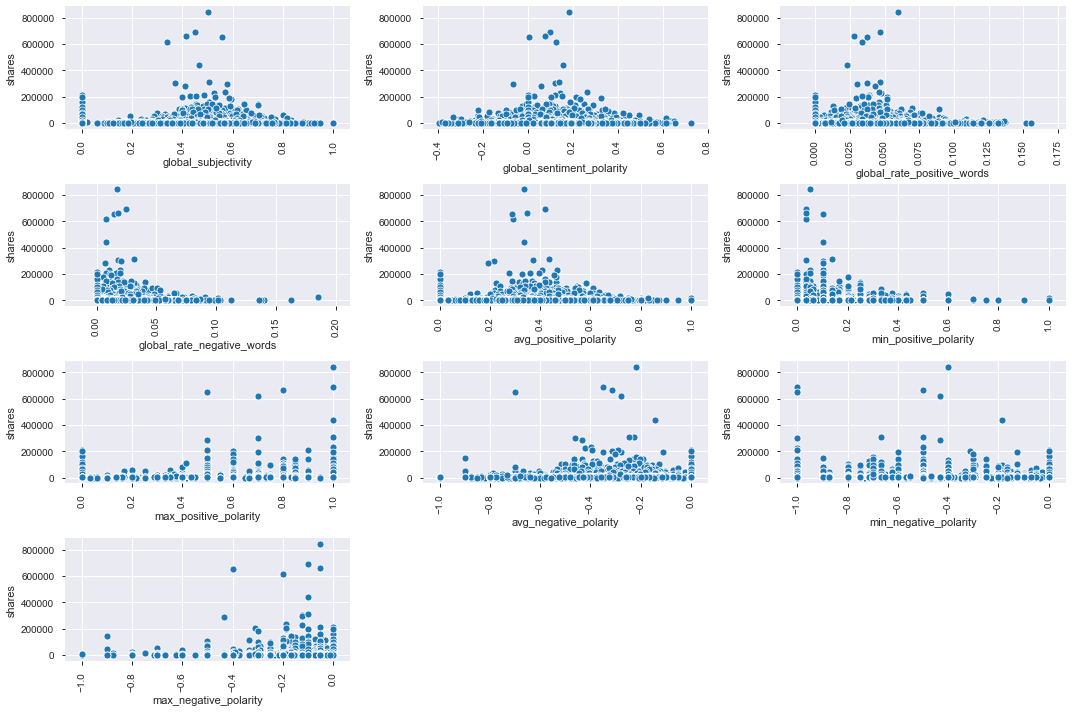

In [6]:
cnt=1
plt.figure(figsize=(15,10))
for i in pol:
    plt.subplot(4,3,cnt)
    cnt+=1
    sns.scatterplot(df[i],df.shares)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Outlier Treatment

In [7]:
df_new=df.drop(columns=['url','timedelta','weekdays', 'data_channel'])#dropping non predictive columns

In [8]:
#Finding skewness of all numerical features
skew=[]
feature=[]
for i in df_new.columns:
    if (len(df[i].value_counts())>8) & (i!='shares'):
        feature.append(i)
        skew.append(df[i].skew()) 

In [9]:
df_skew=pd.DataFrame({'features':feature,'skewness':skew})

In [10]:
df_skew

,features,skewness
0,n_tokens_title,0.165320
1,n_tokens_content,2.945422
2,n_unique_tokens,198.655116
3,n_non_stop_words,198.792445
4,n_non_stop_unique_tokens,198.443294
5,num_hrefs,4.013495
6,num_self_hrefs,5.172751
7,num_imgs,3.946596
8,num_videos,7.019533
9,average_token_length,-4.576012


### Applying boxcox transformation to treat skewness

In [11]:
from scipy.stats import boxcox

In [12]:
for i in df_skew.features:
    if (min(df_new[i])<=0):
        df_new[i]=df_new[i]+np.abs(min(df_new[i]))+1

### Before boxcox transformation

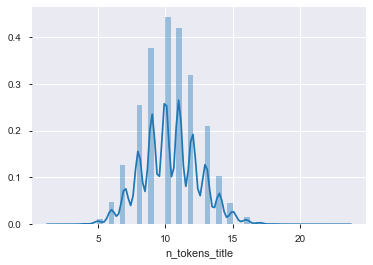

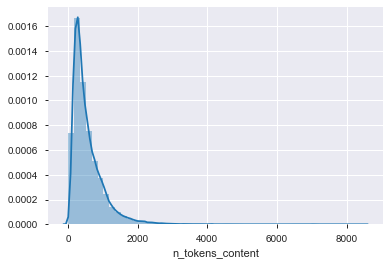

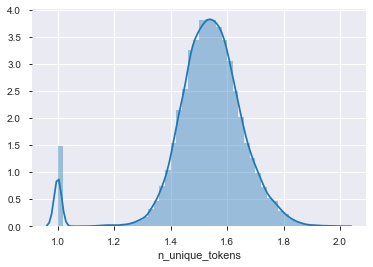

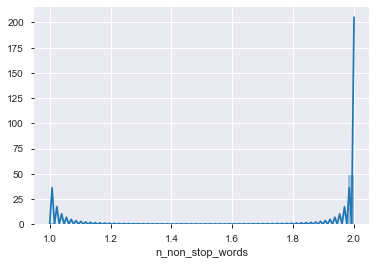

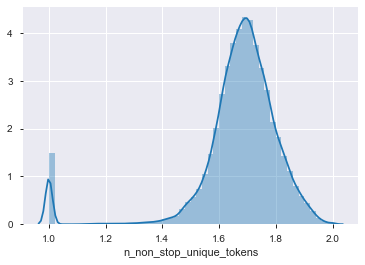

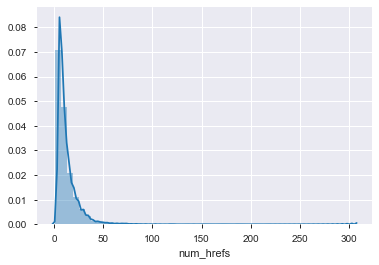

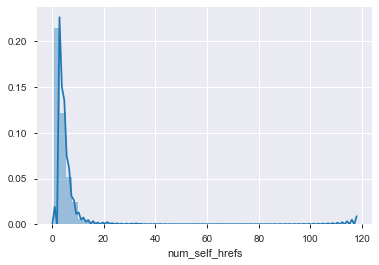

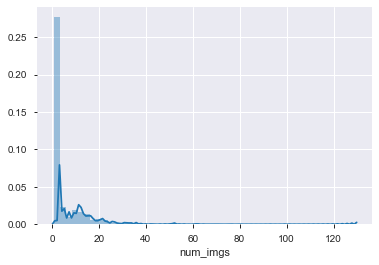

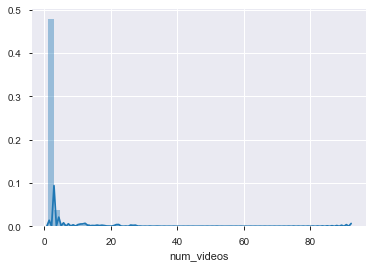

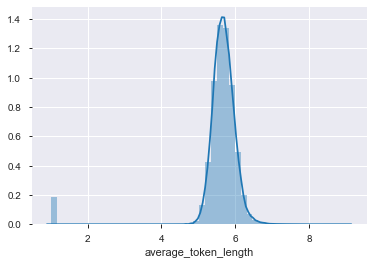

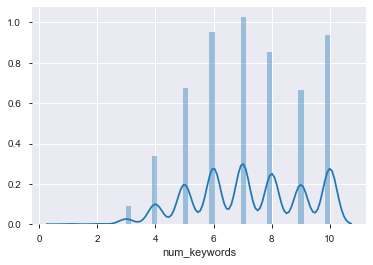

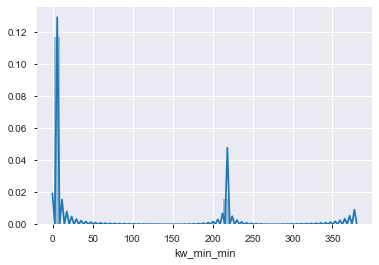

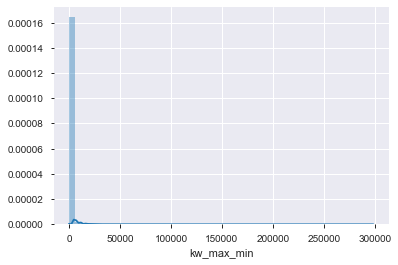

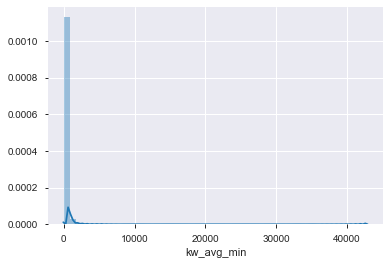

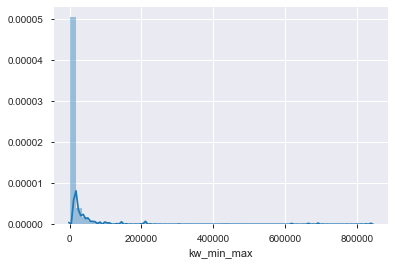

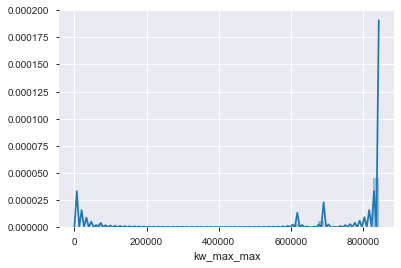

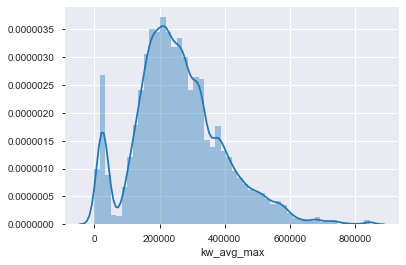

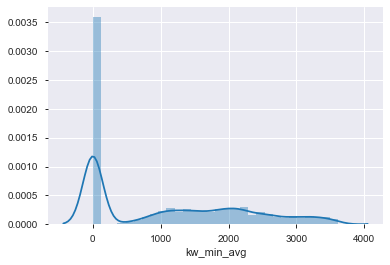

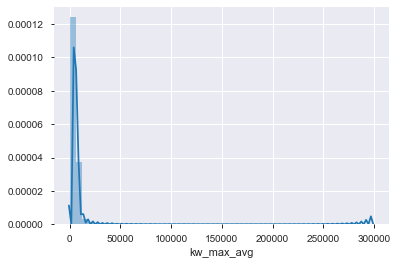

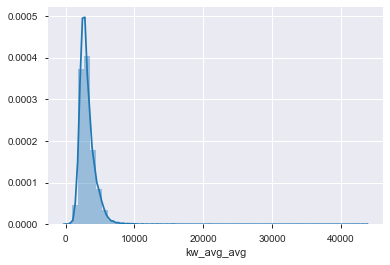

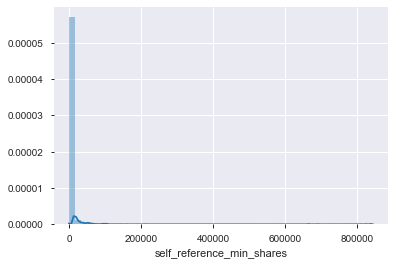

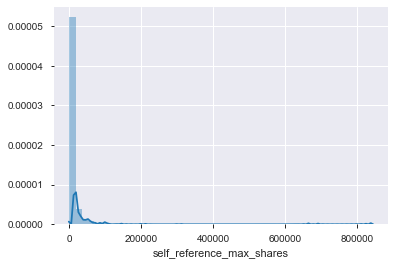

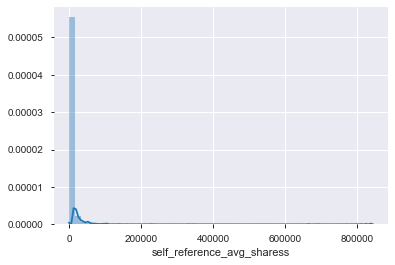

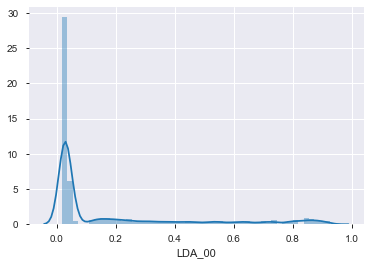

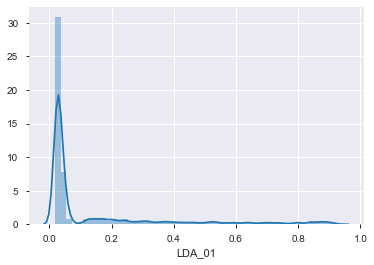

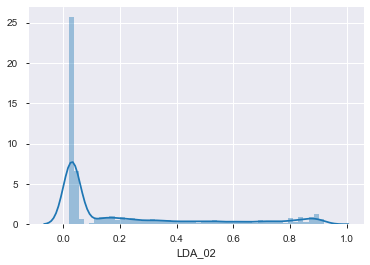

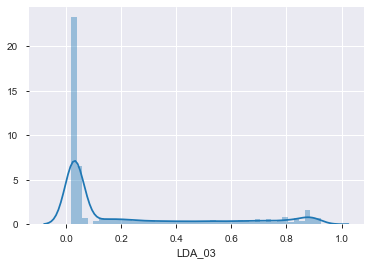

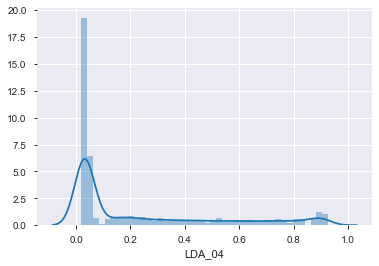

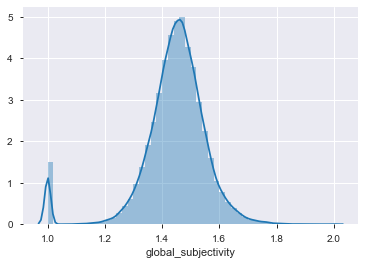

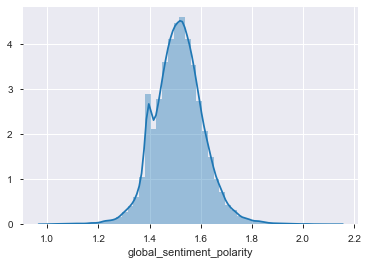

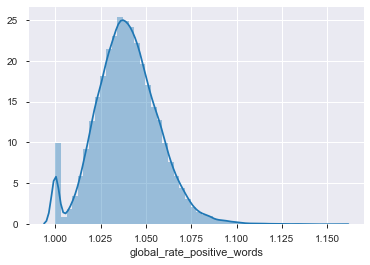

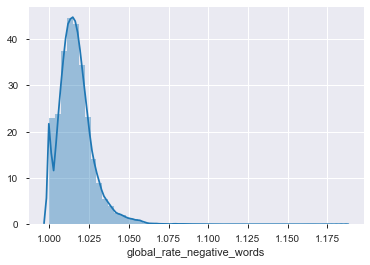

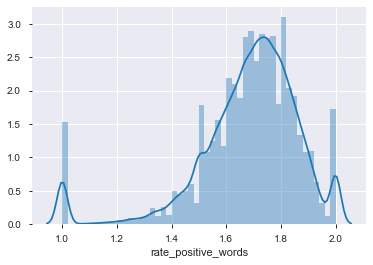

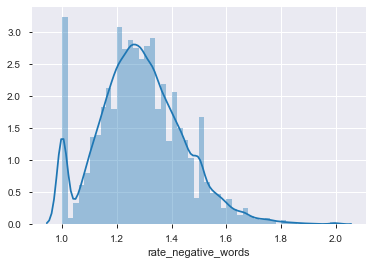

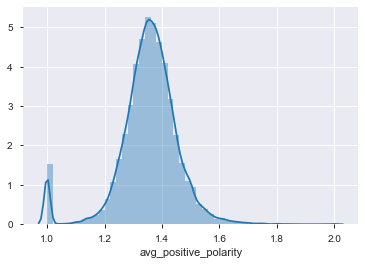

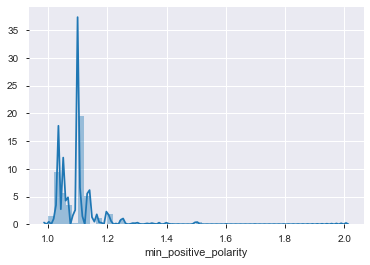

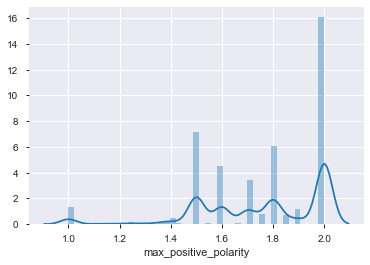

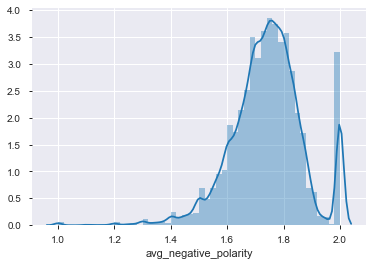

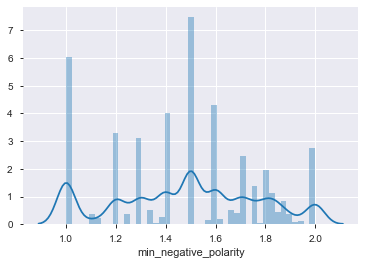

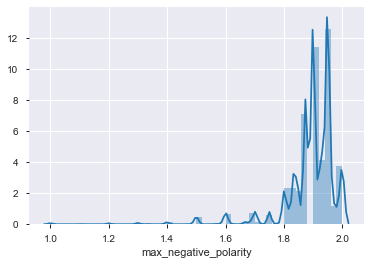

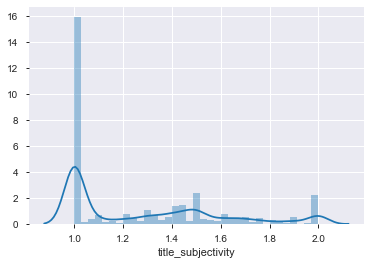

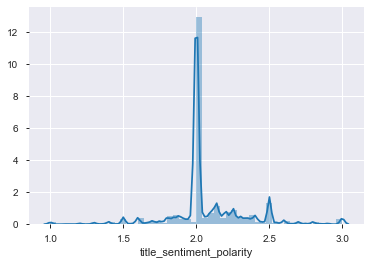

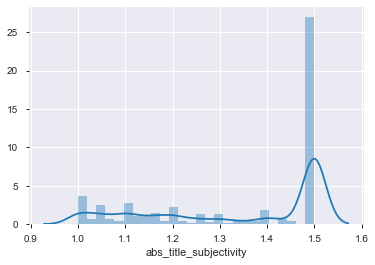

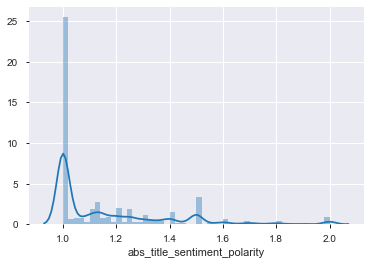

In [133]:
for i in df_skew.features:
    sns.distplot(df_new[i])
    plt.show()

In [13]:
for i in df_skew.features:
    df_new[i]=boxcox(df_new[i])[0]

### After boxcox

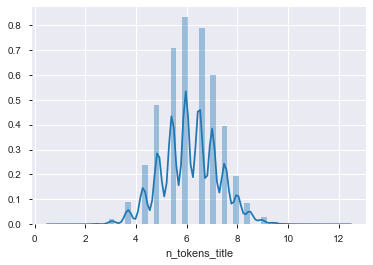

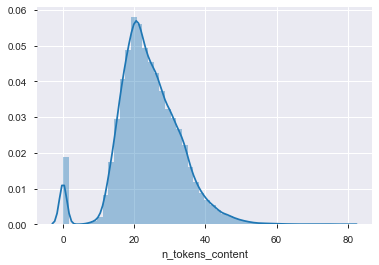

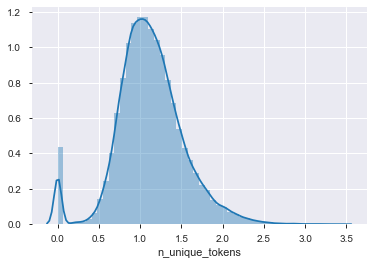

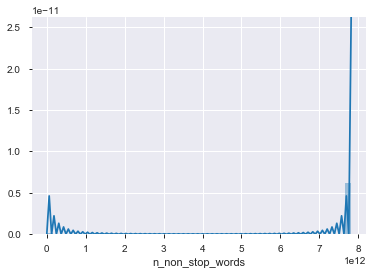

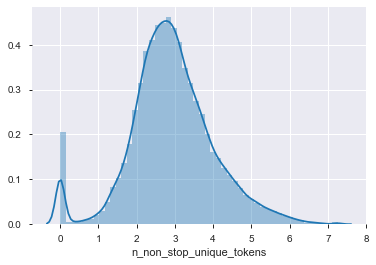

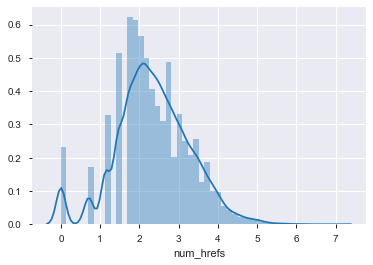

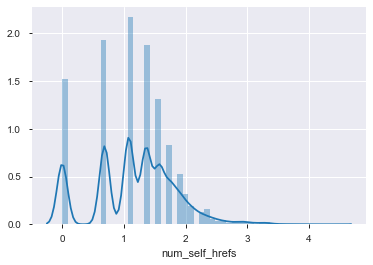

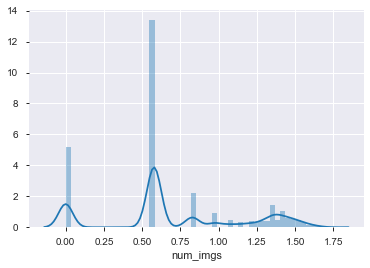

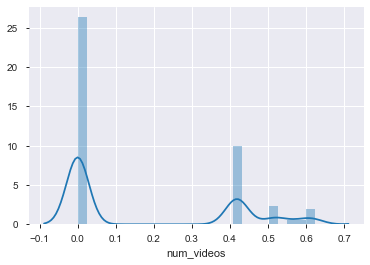

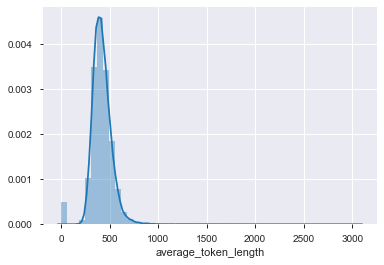

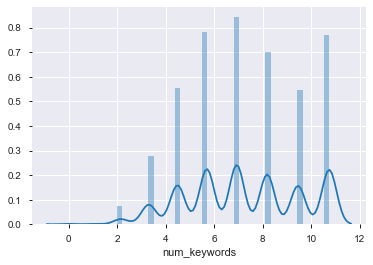

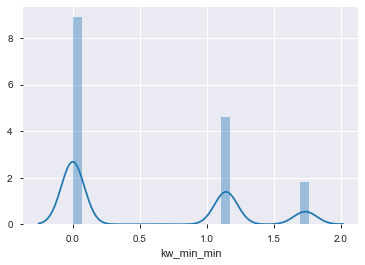

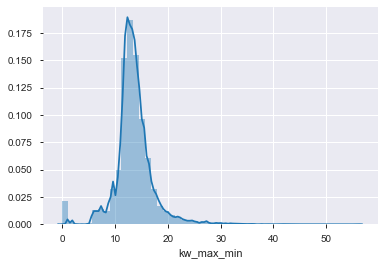

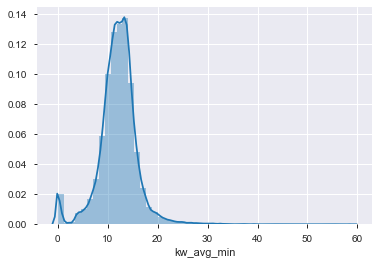

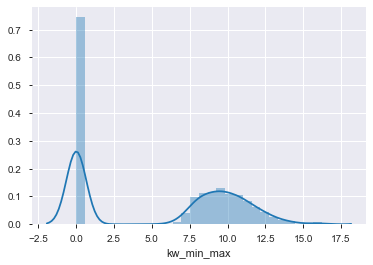

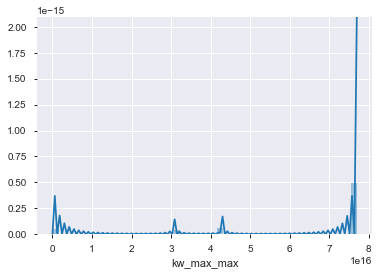

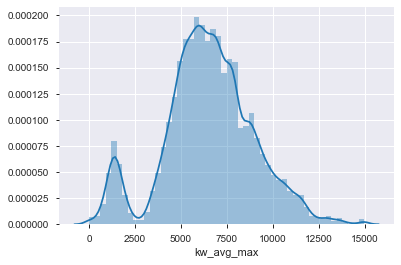

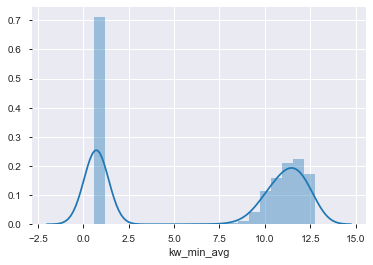

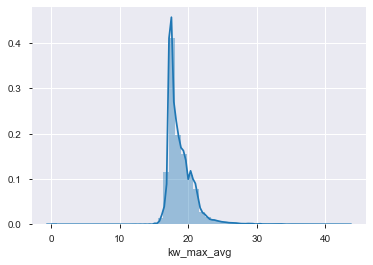

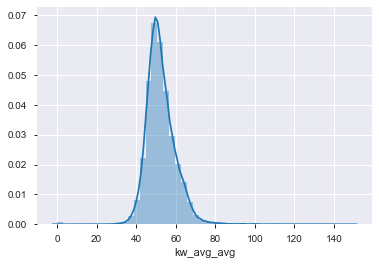

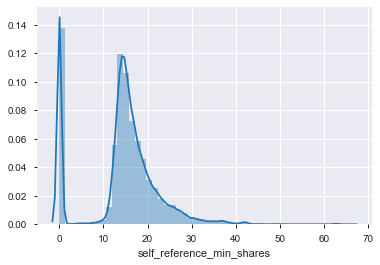

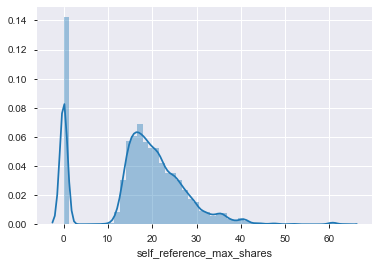

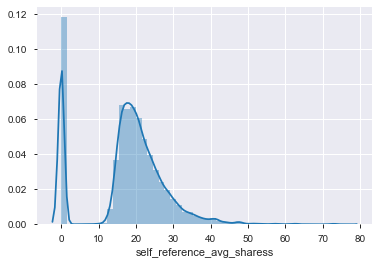

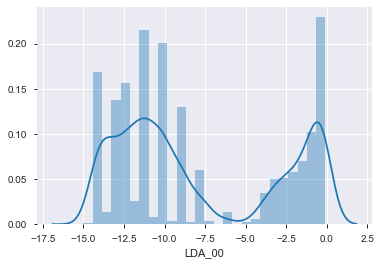

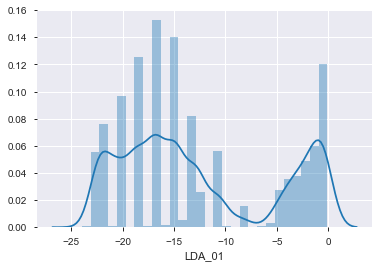

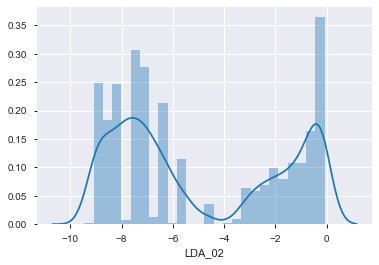

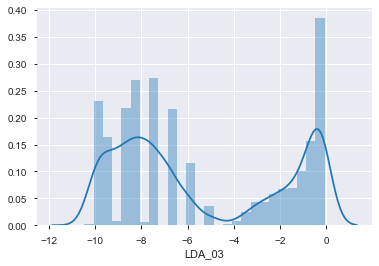

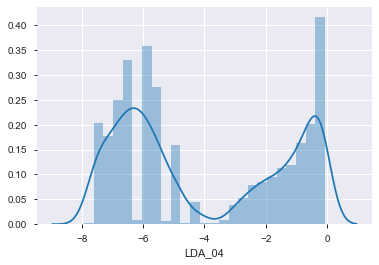

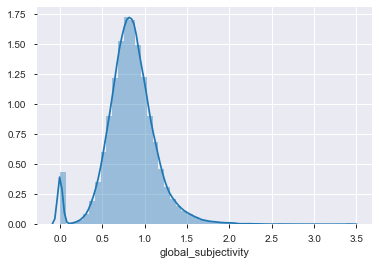

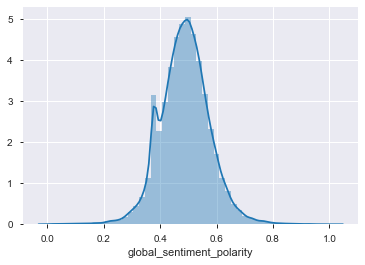

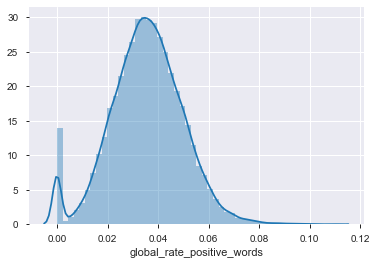

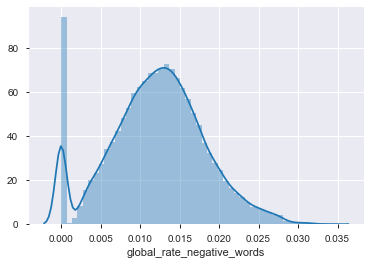

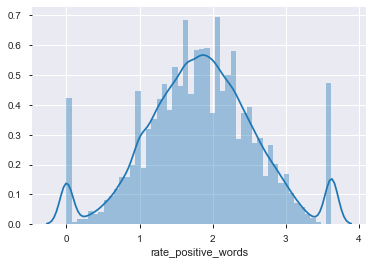

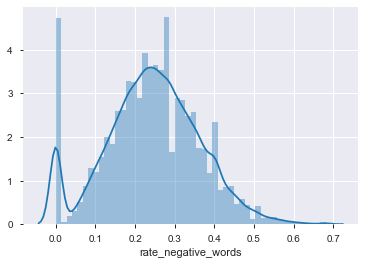

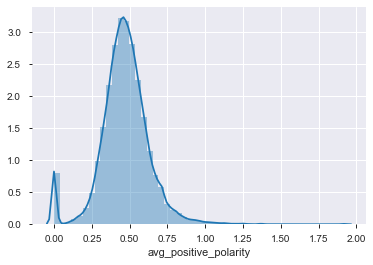

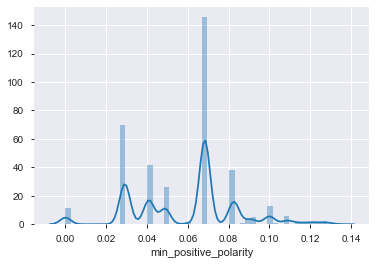

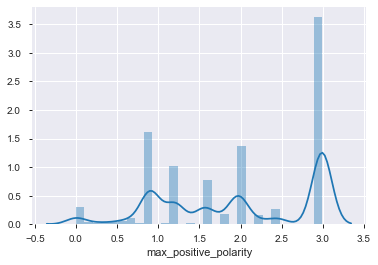

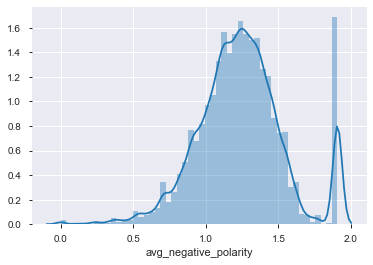

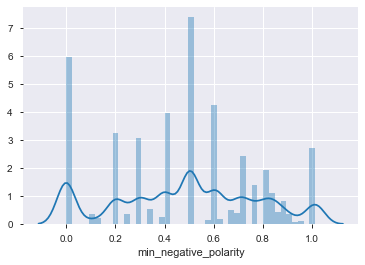

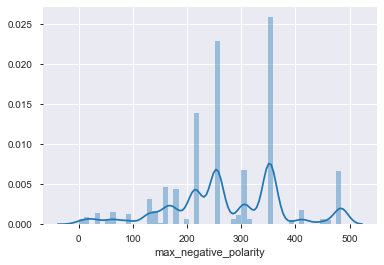

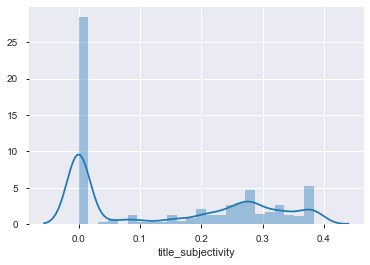

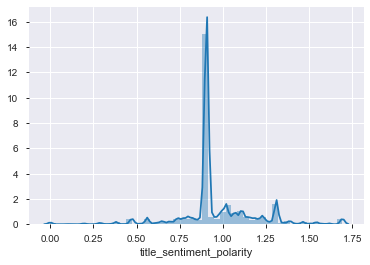

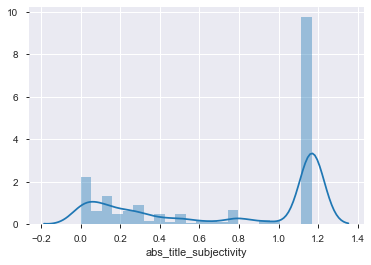

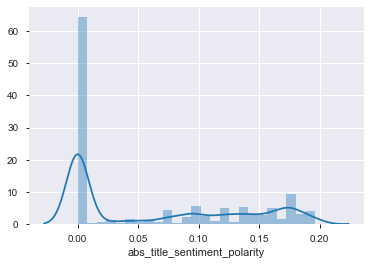

In [135]:
for i in df_skew.features:
    sns.distplot(df_new[i])
    plt.show()

In [ ]:
#Here we can clearly see distributions have become normal to good extent after applying boxcox

### Applying poisson regression as target variable is count

In [14]:
import statsmodels.api as sm

In [15]:
X=df_new.drop(columns='shares')
Y=df_new.shares

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=1)

In [17]:
model=sm.GLM(Y_train,X_train,family=sm.families.Poisson()).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 shares   No. Observations:                27750
Model:                            GLM   Df Residuals:                    27749
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.1943e+08
Date:                Wed, 04 Mar 2020   Deviance:                   4.3861e+08
Time:                        17:48:05   Pearson chi2:                 1.74e+10
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
n_tokens_title                 6.194e-05   7.83e-09   7905.622      0.000    6.19e-05     6.2e-05
n_tokens_content                  0.0002   2.94e-08   8406.679      0.000       0.000       0.000
n_unique_tokens                3.103e-06   3.64e-10   8533.214      0.000     3.1e-06     3.1e-06
n_non_stop_words               7.559e-06   9.02e-10   8377.799      0.000    7.56e-06    7.56e-06
n_non_stop_unique_tokens       2.816e-06   3.16e-10   8914.224      0.000    2.82e-06    2.82e-06
num_hrefs                      3.194e-05   3.92e-09   8137.802      0.000    3.19e-05    3.19e-05
num_self_hrefs                 1.641e-05    2.1e-09   7819.545      0.000    1.64e-05    1.64e-05
num_imgs                       1.056e-05   1.35e-09   7795.170      0.000    1.06e-05    1.06e-05
num_videos                     6.859e-07   1.46e-10   4700.309      0.000    6.86e-07    6.86e-07
average_token_length              0.0026   4.75e-07   5559.103      0.000       0.003       0.003
num_keywords                   8.773e-05   1.11e-08   7933.430      0.000    8.77e-05    8.77e-05
data_channel_is_lifestyle      1.455e-06   1.89e-10   7682.755      0.000    1.45e-06    1.46e-06
data_channel_is_entertainment  1.508e-06   2.13e-10   7073.203      0.000    1.51e-06    1.51e-06
data_channel_is_bus           -3.524e-07   4.52e-11  -7798.537      0.000   -3.53e-07   -3.52e-07
data_channel_is_socmed         2.173e-06   2.78e-10   7817.677      0.000    2.17e-06    2.17e-06
data_channel_is_tech           3.942e-06   5.21e-10   7568.935      0.000    3.94e-06    3.94e-06
data_channel_is_world          2.909e-06   3.46e-10   8403.537      0.000    2.91e-06    2.91e-06
kw_min_min                     2.048e-05   2.57e-09   7977.773      0.000    2.05e-05    2.05e-05
kw_max_min                        0.0001    1.4e-08   8167.601      0.000       0.000       0.000
kw_avg_min                        0.0001   1.43e-08   8193.819      0.000       0.000       0.000
kw_min_max                     3.643e-05   4.57e-09   7976.376      0.000    3.64e-05    3.64e-05
kw_max_max                     3.044e-17   7.29e-21   4176.940      0.000    3.04e-17    3.05e-17
kw_avg_max                        0.0004   5.82e-08   6321.265      0.000       0.000       0.000
kw_min_avg                     5.729e-05   7.26e-09   7894.855      0.000    5.73e-05    5.73e-05
kw_max_avg                        0.0002   1.94e-08   8054.483      0.000       0.000       0.000
kw_avg_avg                        0.0004    4.4e-08   8140.427      0.000       0.000       0.000
self_reference_min_shares      8.751e-05   9.79e-09   8941.258      0.000    8.75e-05    8.75e-05
self_reference_max_shares         0.0001   1.47e-08   8320.384      0.000       0.000       0.000
self_reference_avg_sharess        0.0001   1.

In [ ]:
# As we Pearson chi2:	3.27e+10 should be equal to 1 for poisson and it is very high in this case
# so we go for negative binomial regression

In [36]:
import statsmodels.discrete.discrete_model as smt

In [41]:
nb=smt.NegativeBinomial(Y_train,X_train,loglike_method='nb1').fit()

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


In [42]:
nb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:                 shares   No. Observations:                27750
Model:               NegativeBinomial   Df Residuals:                    27748
Method:                           MLE   Df Model:                            1
Date:                Wed, 04 Mar 2020   Pseudo R-squ.:                     nan
Time:                        18:06:50   Log-Likelihood:                    nan
converged:                      False   LL-Null:                   -2.5325e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
n_tokens_title                       nan        nan        nan        nan         nan         nan
n_tokens_content                     nan        nan        nan        nan         nan         nan
n_unique_tokens                      nan        nan        nan        nan         nan         nan
n_non_stop_words                     nan        nan        nan        nan         nan         nan
n_non_stop_unique_tokens             nan        nan        nan        nan         nan         nan
num_hrefs                            nan        nan        nan        nan         nan         nan
num_self_hrefs                       nan        nan        nan        nan         nan         nan
num_imgs                             nan        nan        nan        nan         nan         nan
num_videos                           nan        nan        nan        nan         nan         nan
average_token_length                 nan        nan        nan        nan         nan         nan
num_keywords                         nan        nan        nan        nan         nan         nan
data_channel_is_lifestyle            nan        nan        nan        nan         nan         nan
data_channel_is_entertainment        nan        nan        nan        nan         nan         nan
data_channel_is_bus                  nan        nan        nan        nan         nan         nan
data_channel_is_socmed               nan        nan        nan        nan         nan         nan
data_channel_is_tech                 nan        nan        nan        nan         nan         nan
data_channel_is_world                nan        nan        nan        nan         nan         nan
kw_min_min                           nan        nan        nan        nan         nan         nan
kw_max_min                           nan        nan        nan        nan         nan         nan
kw_avg_min                           nan        nan        nan        nan         nan         nan
kw_min_max                           nan        nan        nan        nan         nan         nan
kw_max_max                           nan        nan        nan        nan         nan         nan
kw_avg_max                           nan        nan        nan        nan         nan         nan
kw_min_avg                           nan        nan        nan        nan         nan         nan
kw_max_avg                           nan        nan        nan        nan         nan         nan
kw_avg_avg                           nan        nan        nan        nan         nan         nan
self_reference_min_shares            nan        nan        nan        nan         nan         nan
self_reference_max_shares            nan        nan        nan        nan         nan         nan
self_reference_avg_sharess           nan        nan        nan        nan         nan         nan
weekday_is_monday                    nan        nan        nan        nan         nan         nan
weekday

In [19]:
print(model.mu)
print(len(model.mu))

[ 167.42558655 3818.2999542  6625.87684283 ...  755.44551141  274.77847567
 1938.39041881]
27750


In [20]:
import statsmodels.formula.api as smf

In [21]:
X_train['lambda']=model.mu

In [22]:
X_comb=pd.concat([X_train,Y_train],axis=1)

In [25]:
a=((np.array(X_comb['shares'])-np.array(X_comb['lambda']))**2-np.array(X_comb['shares']))/np.array(X_comb['lambda'])

In [29]:
a

array([97102.5799263 ,   174.58419272,   815.80192573, ...,
       58432.67804865,  1785.93183109,  1219.13948652])

In [30]:
X_train['AUX_OLS_DEP'] = a

In [33]:
ols_expr = """AUX_OLS_DEP ~ lambda - 1"""

In [34]:
aux_olsr_results = smf.ols(ols_expr, X_train).fit()

SyntaxError: invalid syntax (<unknown>, line 1)